# Plantation Pilot Testing

This notebook is an initial comparison of model performance across three pilot regions: West Africa, Central America and South America. For each region the training data is loaded based by version (v1, v2, etc.) based on the Collect Earth survey. The labeled data is prepared for input to the model. Several classication models are tested and then performance is saved to a single csv. Performance is plotted on a learning curve to understand the impact of training set size. Finally, we perform a visual assessment of the predictions across a larger plot area.

* [Pilot 1: West Africa](#Pilot_1)
* [Pilot 2: Central America](#Pilot_2)
* [Pilot 3: South America](#Pilot_3)
* [Learning Curves](#Learning_Curves)
* [Hypotheses](#Hypotheses)
* [Conclusions](#Conclusions)

Questions to consider:
1. Is there any consistency in model performance across regions?
2. How much is the transfer learning approach impacting performance?
3. How much training data is needed to improve performance?

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
import ptype_prepare_data as pp
import ptype_run_preds as rp
import ptype_visualize as viz
import score_classifier as sc

import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

<a id='Pilot_1'></a> 
# Pilot 1: West Africa

**Training Data**: Oil palm and rubber plantations in Ghana and Ivory Coast.  

For v08, training data includes 213 plots.  
For v08 + v11, training data includes 313 plots.

## Fit & Score

### Experiment w/ training data

In [46]:
X, y = pp.create_xy((14, 14), ['v08'], drop_prob=False, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y, verbose=True)

X_train: (142, 14, 14, 78) X_test: (71, 14, 14, 78), y_train: (142, 14, 14), y_test: (71, 14, 14)
The data has been scaled to -1.0000000000000002, 1.0000000000000002
Reshaped X_train: (27832, 78) X_test: (13916, 78), y_train: (27832,), y_test: (13916,)


,model,cv,train_score,test_score,roc_auc,precision,recall,f1
0,cat_model_v08,0.7819,0.985,0.8258,0.9111,0.836,0.7535,0.7926


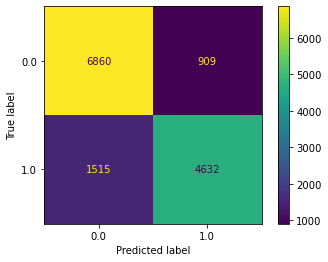

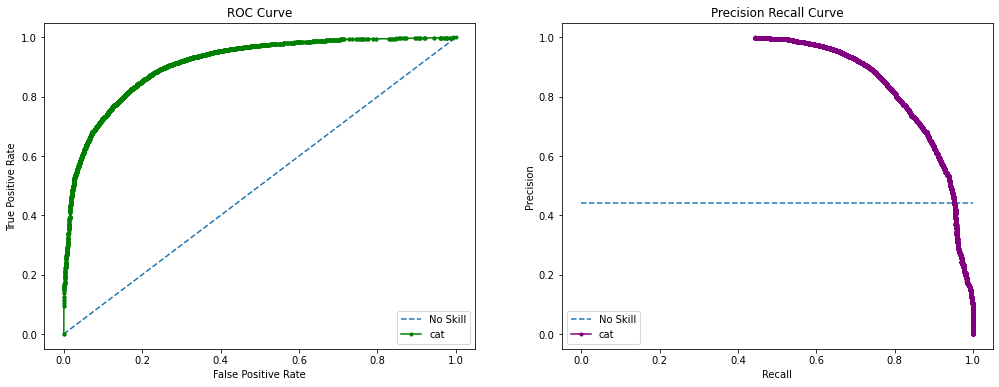

In [47]:
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v08')

Plot id 08012 has no cloud free imagery and will be removed.
Plot id 08023 has no cloud free imagery and will be removed.
Plot id 08039 has no cloud free imagery and will be removed.
Plot id 08114 has no cloud free imagery and will be removed.
Plot id 08124 has no cloud free imagery and will be removed.
Plot id 08170 has no cloud free imagery and will be removed.
Plot id 08181 has no cloud free imagery and will be removed.
Plot id 08204 has no cloud free imagery and will be removed.
Plot id 08214 has no cloud free imagery and will be removed.
Plot id 08216 has no cloud free imagery and will be removed.
Plot id 08223 has no cloud free imagery and will be removed.
X_train: (209, 14, 14, 78) X_test: (104, 14, 14, 78), y_train: (209, 14, 14), y_test: (104, 14, 14)
The data has been scaled to -1.0000000000000002, 1.0000000000000002
Reshaped X_train: (40964, 78) X_test: (20384, 78), y_train: (40964,), y_test: (20384,)


,model,cv,train_score,test_score,roc_auc,precision,recall,f1
0,cat_model_v11,0.7824,0.9831,0.8246,0.892,0.8416,0.8638,0.8525


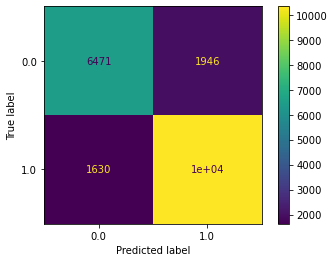

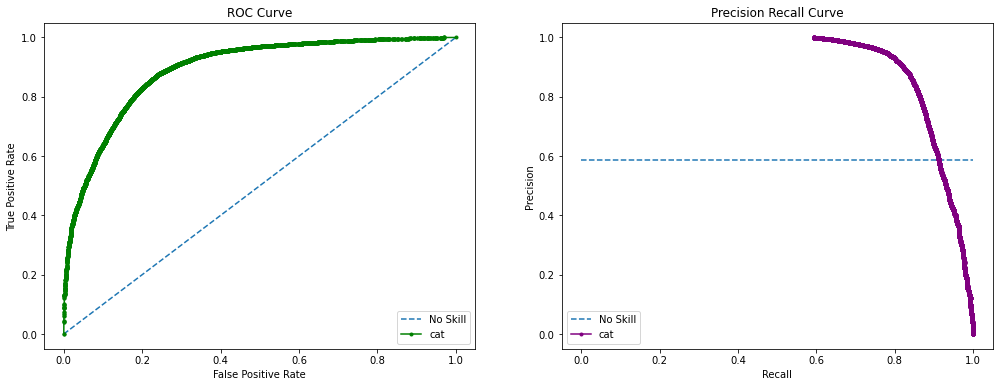

In [75]:
X, y = pp.create_xy((14, 14), ['v08', 'v11'], drop_prob=False, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y, verbose=True)
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v11')

### Experiment w/ scaling and features

Plot id 08012 has no cloud free imagery and will be removed.
Plot id 08023 has no cloud free imagery and will be removed.
Plot id 08039 has no cloud free imagery and will be removed.
Plot id 08114 has no cloud free imagery and will be removed.
Plot id 08124 has no cloud free imagery and will be removed.
Plot id 08170 has no cloud free imagery and will be removed.
Plot id 08181 has no cloud free imagery and will be removed.
Plot id 08204 has no cloud free imagery and will be removed.
Plot id 08214 has no cloud free imagery and will be removed.
Plot id 08216 has no cloud free imagery and will be removed.
Plot id 08223 has no cloud free imagery and will be removed.
The data has been scaled to -1.0000000000000002, 1.0000000000000002


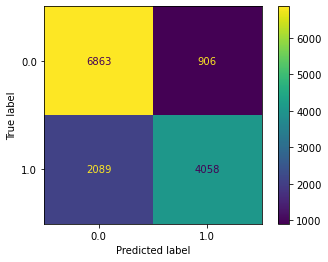

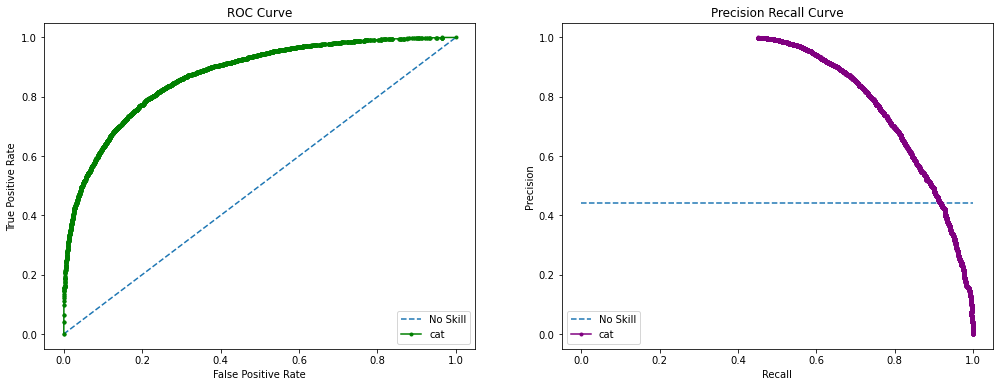

In [48]:
## train a west africa catboost model with no features to use in jurisdictional map

X, y = pp.create_xy((14, 14), ['v08'], drop_prob=False, drop_feats=True, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y, verbose=False)
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v08_nf')

Plot id 08012 has no cloud free imagery and will be removed.
Plot id 08023 has no cloud free imagery and will be removed.
Plot id 08039 has no cloud free imagery and will be removed.
Plot id 08114 has no cloud free imagery and will be removed.
Plot id 08124 has no cloud free imagery and will be removed.
Plot id 08170 has no cloud free imagery and will be removed.
Plot id 08181 has no cloud free imagery and will be removed.
Plot id 08204 has no cloud free imagery and will be removed.
Plot id 08214 has no cloud free imagery and will be removed.
Plot id 08216 has no cloud free imagery and will be removed.
Plot id 08223 has no cloud free imagery and will be removed.
The data has been scaled to -1.0000000000000002, 1.0000000000000002


,model,cv,train_score,test_score,roc_auc,precision,recall,f1
0,cat_model_v11_nf,0.7783,0.9289,0.7823,0.8604,0.8135,0.8164,0.8149


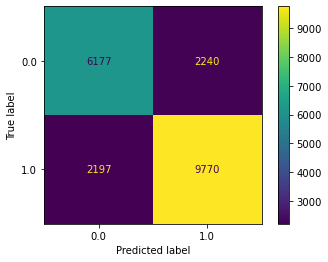

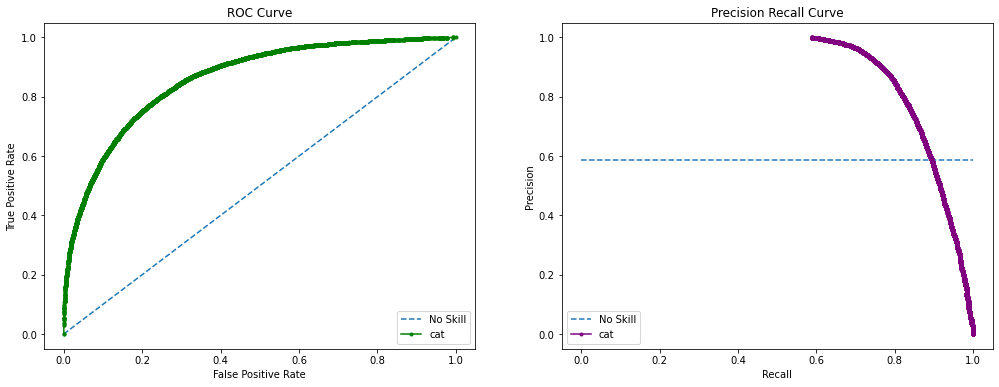

In [76]:
## drop features and add agroforestry data (v11)

X, y = pp.create_xy((14, 14), ['v08', 'v11'], drop_prob=False, drop_feats=True, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y, verbose=False)
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v11_nf')

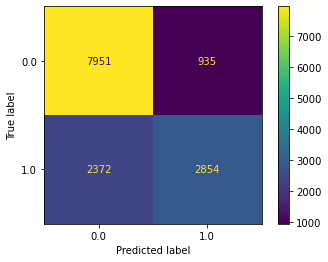

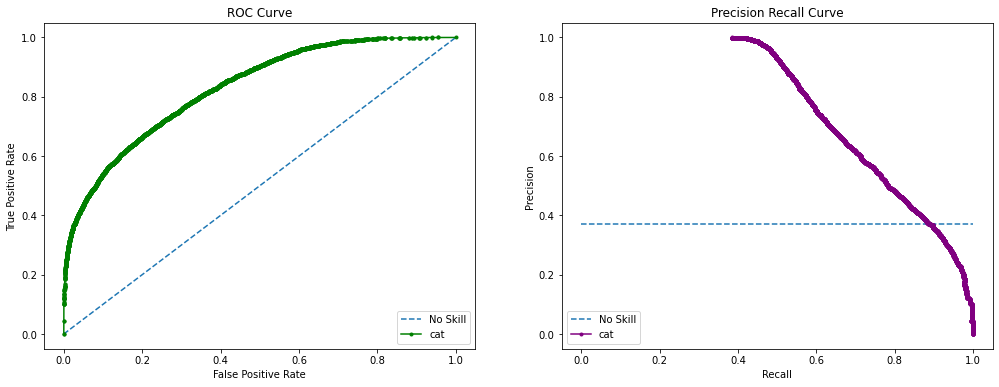

In [3]:
# train a model with no features and no scaling - OLD
# greater true positives, less true negatives

X, y = pp.create_xy((14, 14), ['v8'], drop_prob=False, drop_feats=True, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale(X, y) # no scaling
eval_df, preds = rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v8_nf_unscaled')

In [6]:
sc.print_scores('cat_model_v8_nf_unscaled', X_train_ss, X_test_ss, y_train, y_test)

cv: 0.7817
train: 0.9484
test: 0.7657
roc_auc: 0.8297
precision: 0.7532
recall: 0.5461
f1: 0.6332


X_train: (146, 14, 14, 13) X_test: (72, 14, 14, 13), y_train: (146, 14, 14), y_test: (72, 14, 14)
The data has been scaled to -1.0000000000000002, 1.0
Reshaped X_train: (28616, 13) X_test: (14112, 13), y_train: (28616,), y_test: (14112,)


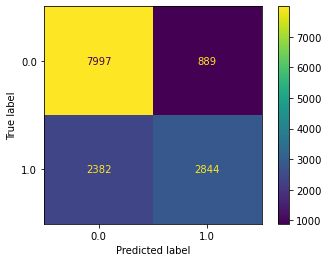

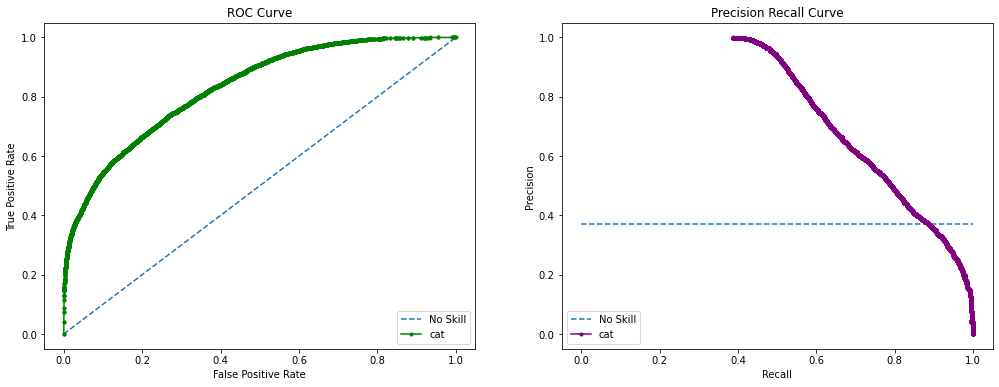

In [7]:
# train a model with no features and manual scaling _ OLD

X, y = pp.create_xy((14, 14), ['v8'], drop_prob=False, drop_feats=True, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y, verbose=True) # new function
eval_df, preds = rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v8_nf_scaledman')

Plot id 08012 has no cloud free imagery and will be removed.
Plot id 08023 has no cloud free imagery and will be removed.
Plot id 08039 has no cloud free imagery and will be removed.
Plot id 08114 has no cloud free imagery and will be removed.
Plot id 08124 has no cloud free imagery and will be removed.
Plot id 08170 has no cloud free imagery and will be removed.
Plot id 08181 has no cloud free imagery and will be removed.
Plot id 08204 has no cloud free imagery and will be removed.
Plot id 08214 has no cloud free imagery and will be removed.
Plot id 08216 has no cloud free imagery and will be removed.
Plot id 08223 has no cloud free imagery and will be removed.
Baseline: 0.409


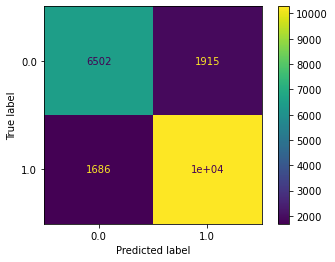

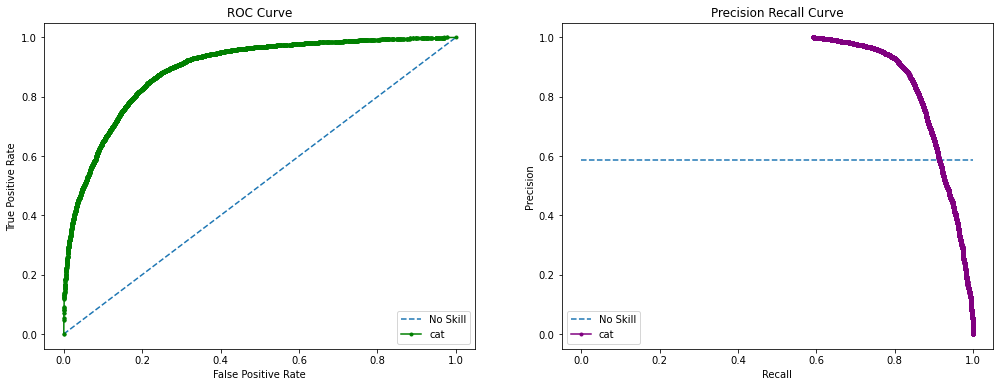

In [5]:
## train model w/ updated scaling (fixes for s1 and s2 raw data)
X, y = pp.create_xy((14, 14), ['v08', 'v11'], drop_prob=False, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y, 'v11', verbose=False)
eval_df = rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v11')

Plot id 08012 has no cloud free imagery and will be removed.
Plot id 08023 has no cloud free imagery and will be removed.
Plot id 08039 has no cloud free imagery and will be removed.
Plot id 08114 has no cloud free imagery and will be removed.
Plot id 08124 has no cloud free imagery and will be removed.
Plot id 08170 has no cloud free imagery and will be removed.
Plot id 08181 has no cloud free imagery and will be removed.
Plot id 08204 has no cloud free imagery and will be removed.
Plot id 08214 has no cloud free imagery and will be removed.
Plot id 08216 has no cloud free imagery and will be removed.
Plot id 08223 has no cloud free imagery and will be removed.
Baseline: 0.409
X_train: (209, 14, 14, 78) X_test: (104, 14, 14, 78), y_train: (209, 14, 14), y_test: (104, 14, 14)
Reshaped X_train: (40964, 78) X_test: (20384, 78), y_train: (40964,), y_test: (20384,)


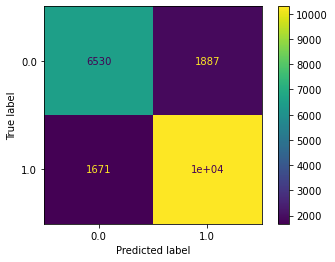

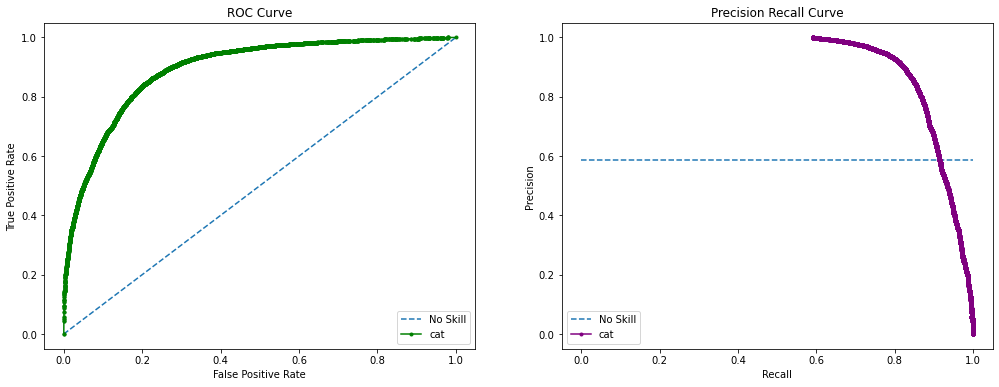

In [7]:
# train a model with no scaling
X, y = pp.create_xy((14, 14), ['v08', 'v11'], drop_prob=False, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_no_scaling(X, y, verbose=True)
eval_df = rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v11_ns')

Plot id 08012 has no cloud free imagery and will be removed.
Plot id 08023 has no cloud free imagery and will be removed.
Plot id 08039 has no cloud free imagery and will be removed.
Plot id 08114 has no cloud free imagery and will be removed.
Plot id 08124 has no cloud free imagery and will be removed.
Plot id 08170 has no cloud free imagery and will be removed.
Plot id 08181 has no cloud free imagery and will be removed.
Plot id 08204 has no cloud free imagery and will be removed.
Plot id 08214 has no cloud free imagery and will be removed.
Plot id 08216 has no cloud free imagery and will be removed.
Plot id 08223 has no cloud free imagery and will be removed.
Baseline: 0.409


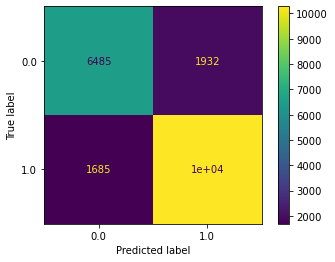

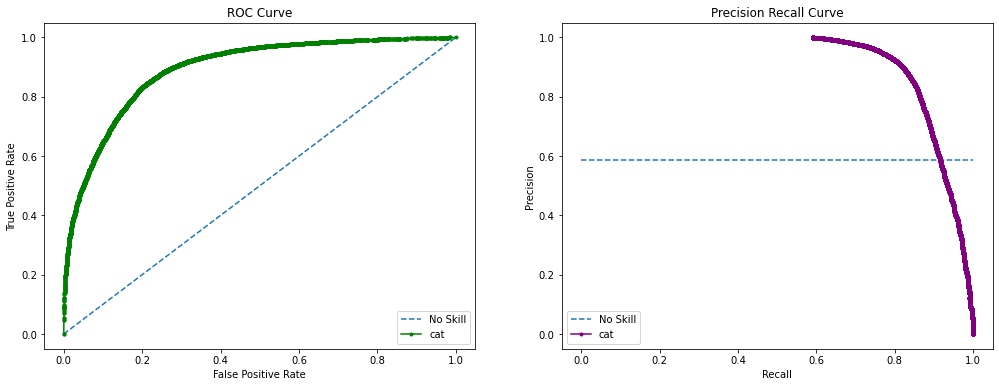

In [26]:
X, y = pp.create_xy((14, 14), ['v08', 'v11'], drop_prob=False, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_no_scaling(X, y, verbose=False)
pred, probs = rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat', 'v11')

## Compare Performance

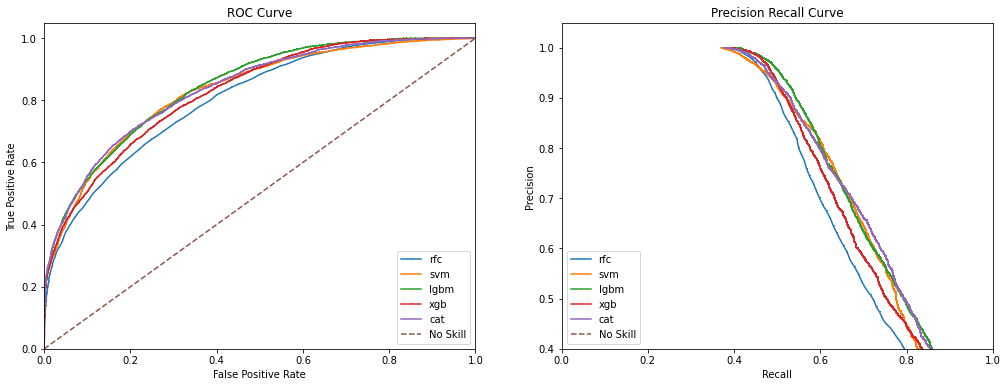

In [41]:
# using old TML
rp.roc_curve_comp(X_train_ss, X_test_ss, y_train, y_test, ['rfc', 'svm', 'lgbm', 'xgb', 'cat'], 'v8')

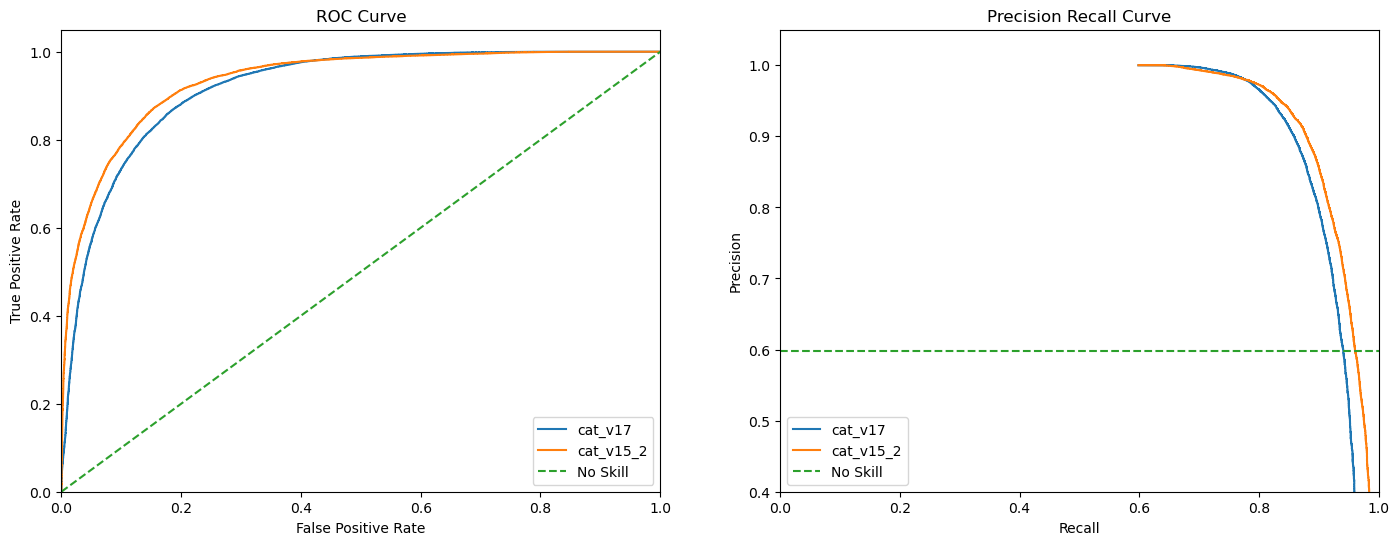

In [14]:
# West Africa
X, y = pp.create_xy(['v08', 'v11', 'v14', 'v15', 'v17'], 
                    classes='binary', 
                    drop_prob=False, 
                    drop_feats=False, 
                    feature_select=[],
                    verbose=True)

X_train_ss, X_test_ss, y_train, y_test = pp.reshape_no_scaling(X, y)
viz.roc_curve_comp(X_test_ss, y_test, ['cat_v17', 'cat_v15_2'])

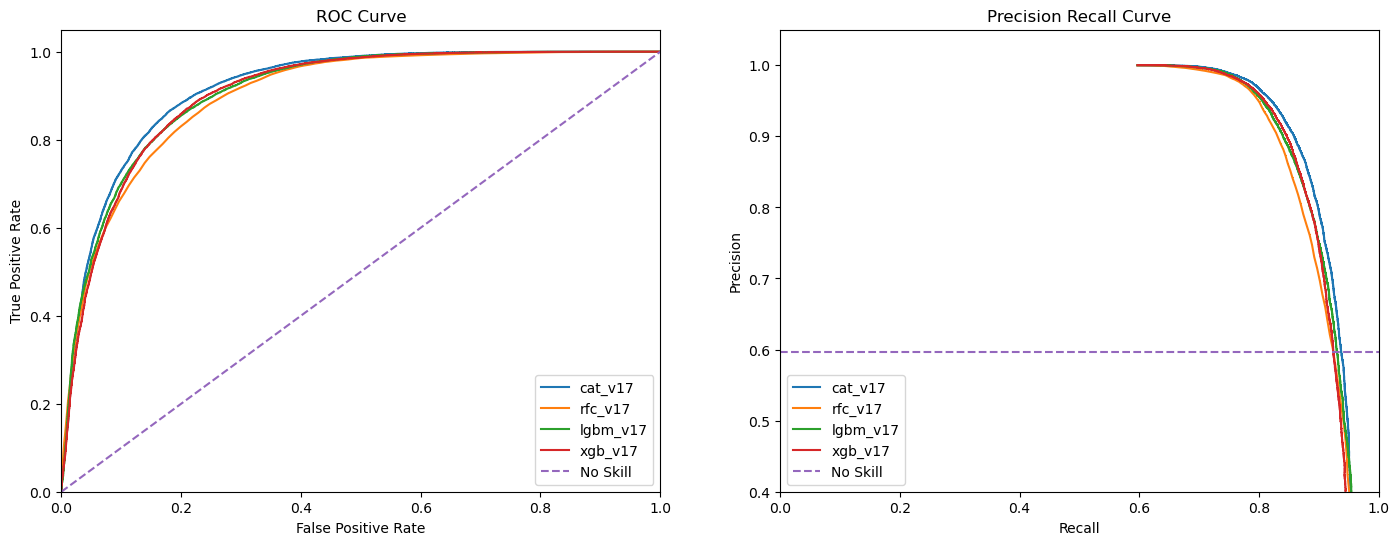

In [27]:
viz.roc_curve_comp(X_test_ss, y_test, ['cat_v17', 'rfc_v17', 'lgbm_v17', 'xgb_v17'])

In [12]:
# West Africa -- update model with relabled v08
selected = [0, 3, 4, 7, 9, 11, 12, 16, 18, 19, 20, 24, 25, 27, 28, 29, 30, 31, 32, 36, 39, 41, 42, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]

X, y = pp.create_xy(['v08', 'v11', 'v14', 'v15', 'v17'], 
                    classes='binary', 
                    drop_prob=False, 
                    drop_feats=False, 
                    feature_select=selected,
                    verbose=True)

X_train_ss, X_test_ss, y_train, y_test = pp.reshape_no_scaling(X, y)
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat', 'v17_fs')

37.0 plots labeled unknown were dropped from v08.
53.0 plots labeled unknown were dropped from v14.
2.0 plots labeled unknown were dropped from v15.
Plot id 08012 has no cloud free imagery and will be removed.
Plot id 08039 has no cloud free imagery and will be removed.
Plot id 08114 has no cloud free imagery and will be removed.
Plot id 08124 has no cloud free imagery and will be removed.
Plot id 08170 has no cloud free imagery and will be removed.
Plot id 08181 has no cloud free imagery and will be removed.
Plot id 08204 has no cloud free imagery and will be removed.
Plot id 08214 has no cloud free imagery and will be removed.
Plot id 08216 has no cloud free imagery and will be removed.
Plot id 08223 has no cloud free imagery and will be removed.
Plot id 14027 has no cloud free imagery and will be removed.
Plot id 170078 has no cloud free imagery and will be removed.
Plot id 170098 has no cloud free imagery and will be removed.
Plot id 1700100 has no cloud free imagery and will be re

(array([1., 1., 1., ..., 0., 0., 0.]),
 array([0., 1., 1., ..., 0., 0., 0.]),
 array([[0.79130711, 0.20869289],
        [0.07216072, 0.92783928],
        [0.00301935, 0.99698065],
        ...,
        [0.96953898, 0.03046102],
        [0.99871538, 0.00128462],
        [0.99329805, 0.00670195]]),
 array([0.20869289, 0.92783928, 0.99698065, ..., 0.03046102, 0.00128462,
        0.00670195]))

In [11]:
X, y = pp.create_xy(['v08', 'v11', 'v14', 'v15', 'v17'], 
                    classes='binary', 
                    drop_prob=False, 
                    drop_feats=False, 
                    feature_select=[],
                    verbose=True)

X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y, 'v17')
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat', 'v17_scaled')

37.0 plots labeled unknown were dropped from v08.
53.0 plots labeled unknown were dropped from v14.
2.0 plots labeled unknown were dropped from v15.
Plot id 08012 has no cloud free imagery and will be removed.
Plot id 08039 has no cloud free imagery and will be removed.
Plot id 08114 has no cloud free imagery and will be removed.
Plot id 08124 has no cloud free imagery and will be removed.
Plot id 08170 has no cloud free imagery and will be removed.
Plot id 08181 has no cloud free imagery and will be removed.
Plot id 08204 has no cloud free imagery and will be removed.
Plot id 08214 has no cloud free imagery and will be removed.
Plot id 08216 has no cloud free imagery and will be removed.
Plot id 08223 has no cloud free imagery and will be removed.
Plot id 14027 has no cloud free imagery and will be removed.
Plot id 170078 has no cloud free imagery and will be removed.
Plot id 170098 has no cloud free imagery and will be removed.
Plot id 1700100 has no cloud free imagery and will be re

(array([1., 1., 1., ..., 0., 0., 0.]),
 array([0., 1., 1., ..., 0., 0., 0.]),
 array([[5.31744084e-01, 4.68255916e-01],
        [8.89549976e-02, 9.11045002e-01],
        [3.37570366e-03, 9.96624296e-01],
        ...,
        [9.54216506e-01, 4.57834939e-02],
        [9.99468927e-01, 5.31072557e-04],
        [9.91868716e-01, 8.13128383e-03]]),
 array([4.68255916e-01, 9.11045002e-01, 9.96624296e-01, ...,
        4.57834939e-02, 5.31072557e-04, 8.13128383e-03]))

<a id='Pilot_2'></a> 
# Pilot 2: Central America

**Training Data**: Oil palm and orchard plantations in Guatemala and Costa Rica.

For v03 + v04 + v10 training data includes 259 plots.  

## Fit & Score

In [79]:
# retrained as of 11/7/22
X, y = pp.create_xy((14, 14), ['v03', 'v04', 'v10'], drop_prob=False, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y)

Plot id 04003 has no cloud free imagery and will be removed.
Plot id 04005 has no cloud free imagery and will be removed.
Plot id 04007 has no cloud free imagery and will be removed.
Plot id 04009 has no cloud free imagery and will be removed.
Plot id 10043 has no cloud free imagery and will be removed.
Plot id 10067 has no cloud free imagery and will be removed.


,model,cv,train_score,test_score,roc_auc,precision,recall,f1
0,cat_model_v10,0.9073,0.9982,0.8269,0.9126,0.8695,0.7876,0.8265


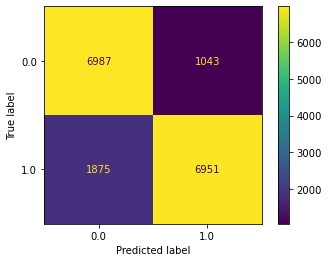

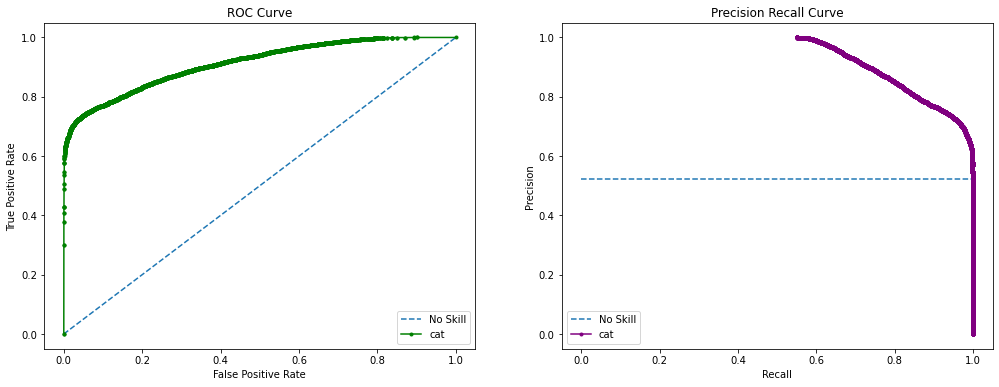

In [81]:
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v10')

Plot id 04003 has no cloud free imagery and will be removed.
Plot id 04005 has no cloud free imagery and will be removed.
Plot id 04007 has no cloud free imagery and will be removed.
Plot id 04009 has no cloud free imagery and will be removed.
Plot id 10043 has no cloud free imagery and will be removed.
Plot id 10067 has no cloud free imagery and will be removed.
The data has been scaled to -1.0000000000000002, 1.0000000000000002


,model,cv,train_score,test_score,roc_auc,precision,recall,f1
0,cat_model_v10_nf,0.895,0.9854,0.8293,0.9098,0.8685,0.7942,0.8297


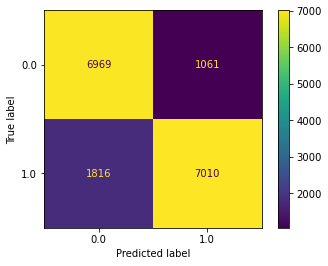

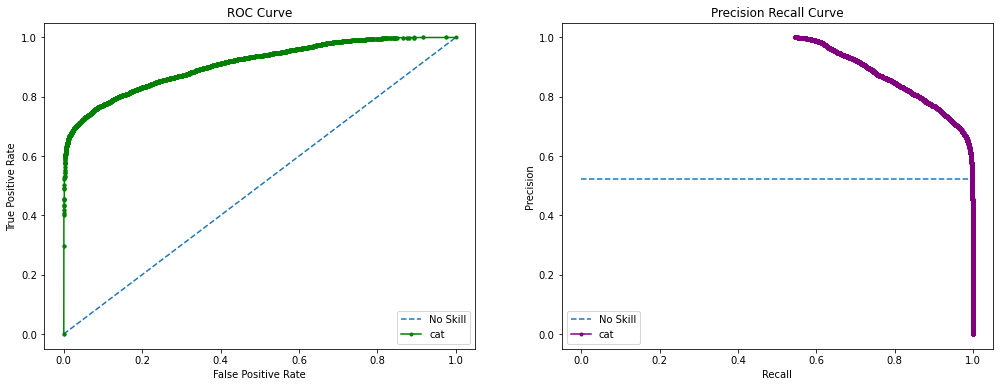

In [88]:
# train a no feats model for jurisdictional scaling exercise
X, y = pp.create_xy((14, 14), ['v03', 'v04', 'v10'], drop_prob=False, drop_feats=True, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y)
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v10_nf')

In [10]:
X, y = pp.create_xy((14, 14), ['v03', 'v04', 'v10'], drop_prob=False, drop_feats=True, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y)
rp.fit_eval_regressor(X_train_ss, X_test_ss, y_train, y_test, 'rfr','v10_nf')

Plot id 04003 has no cloud free imagery and will be removed.
Plot id 04005 has no cloud free imagery and will be removed.
Plot id 04007 has no cloud free imagery and will be removed.
Plot id 04009 has no cloud free imagery and will be removed.
Plot id 10043 has no cloud free imagery and will be removed.
Plot id 10067 has no cloud free imagery and will be removed.
Baseline: 0.483
The data has been scaled to -1.0000000000000002, 1.0000000000000002


,model,cv,train_score,test_score,roc_auc,precision,recall,f1,date
0,rfr_model_v10_nf,0.6538,0.9832,0.4658,NaN,NaN,NaN,NaN,2022-11-09


Plot id 04003 has no cloud free imagery and will be removed.
Plot id 04005 has no cloud free imagery and will be removed.
Plot id 04007 has no cloud free imagery and will be removed.
Plot id 04009 has no cloud free imagery and will be removed.
Plot id 10043 has no cloud free imagery and will be removed.
Plot id 10067 has no cloud free imagery and will be removed.
Baseline: 0.483


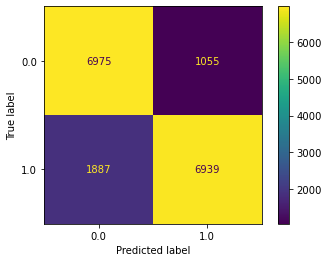

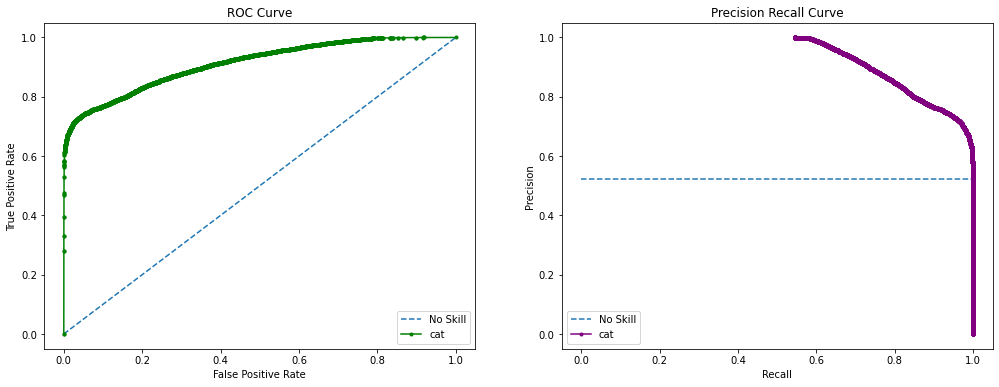

In [2]:
# train model w/ no scaling
X, y = pp.create_xy((14, 14), ['v03', 'v04', 'v10'], drop_prob=False, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_no_scaling(X, y)
pred, probs = rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v10')

## Compare Performance

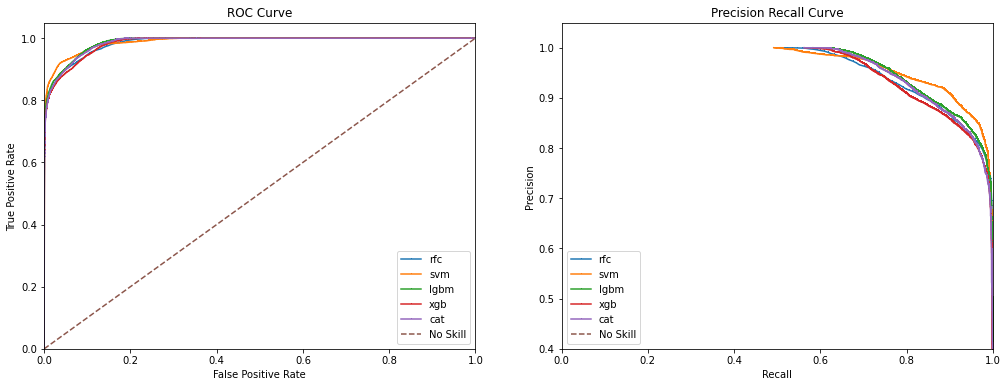

In [21]:
# uses old TML
rp.roc_curve_comp(X_train_ss, X_test_ss, y_train, y_test, ['rfc', 'svm', 'lgbm', 'xgb', 'cat'], 'v10')

<a id='Pilot_3'></a> 
# Pilot 3: South America

**Training Data**: Oil palm, rubber, fruit, cocoa and eucalyptus plantations in Brazil.  

For v09, training data includes 204 plots.  
For v09 + v13, training data includes 304 plots.

## Fit & Score

Plot id 09017 has no cloud free imagery and will be removed.
Plot id 09060 has no cloud free imagery and will be removed.
Plot id 09066 has no cloud free imagery and will be removed.
Plot id 09127 has no cloud free imagery and will be removed.
Plot id 09129 has no cloud free imagery and will be removed.
Plot id 09136 has no cloud free imagery and will be removed.
Plot id 09139 has no cloud free imagery and will be removed.
Plot id 09142 has no cloud free imagery and will be removed.
Plot id 09167 has no cloud free imagery and will be removed.
Plot id 09169 has no cloud free imagery and will be removed.
Plot id 09176 has no cloud free imagery and will be removed.
Plot id 09180 has no cloud free imagery and will be removed.
Plot id 09183 has no cloud free imagery and will be removed.
Plot id 09185 has no cloud free imagery and will be removed.
Plot id 09190 has no cloud free imagery and will be removed.
Plot id 09200 has no cloud free imagery and will be removed.
Plot id 09203 has no clo

,model,cv,train_score,test_score,roc_auc,precision,recall,f1
0,cat_model_v09,0.7918,0.9985,0.7469,0.794,0.6355,0.5478,0.5884


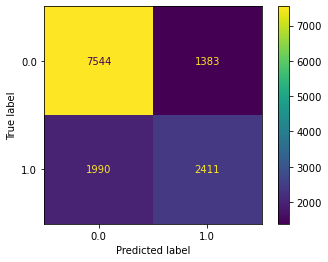

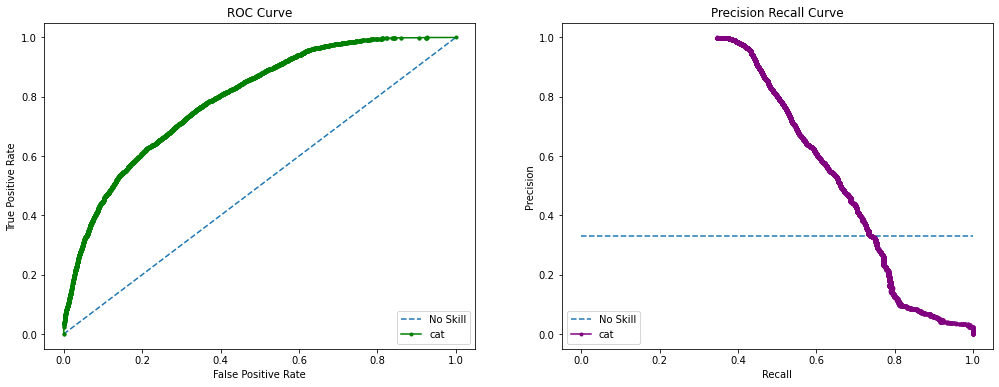

In [51]:
# retrained as of 11/7/22
X, y = pp.create_xy((14, 14), ['v09'], drop_prob=False, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y)
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v09')

Plot id 09017 has no cloud free imagery and will be removed.
Plot id 09060 has no cloud free imagery and will be removed.
Plot id 09066 has no cloud free imagery and will be removed.
Plot id 09127 has no cloud free imagery and will be removed.
Plot id 09129 has no cloud free imagery and will be removed.
Plot id 09136 has no cloud free imagery and will be removed.
Plot id 09139 has no cloud free imagery and will be removed.
Plot id 09142 has no cloud free imagery and will be removed.
Plot id 09167 has no cloud free imagery and will be removed.
Plot id 09169 has no cloud free imagery and will be removed.
Plot id 09176 has no cloud free imagery and will be removed.
Plot id 09180 has no cloud free imagery and will be removed.
Plot id 09183 has no cloud free imagery and will be removed.
Plot id 09185 has no cloud free imagery and will be removed.
Plot id 09190 has no cloud free imagery and will be removed.
Plot id 09200 has no cloud free imagery and will be removed.
Plot id 09203 has no clo

,model,cv,train_score,test_score,roc_auc,precision,recall,f1
0,cat_model_v13,0.7976,0.9963,0.8628,0.9397,0.8703,0.8934,0.8817


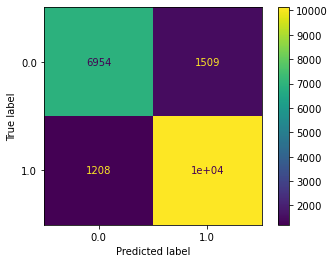

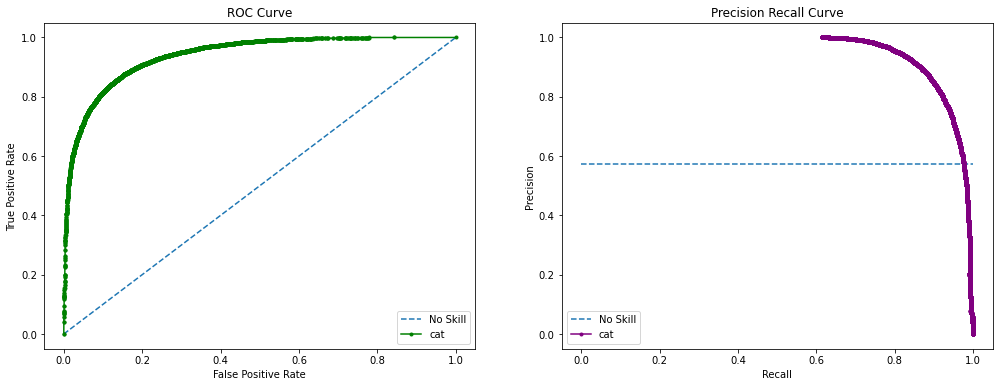

In [72]:
# train again including Brazil's agroforestry data
X, y = pp.create_xy((14, 14), ['v09', 'v13'], drop_prob=False, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y)
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v13')

## Compare Performance

In [ ]:
# uses old TML
rp.roc_curve_comp(X_train_ss, X_test_ss, y_train, y_test, ['rfc', 'svm', 'lgbm', 'xgb', 'cat'], 'v9')

# Learning Curves

Plot id 04003 has no cloud free imagery and will be removed.
Plot id 04005 has no cloud free imagery and will be removed.
Plot id 04007 has no cloud free imagery and will be removed.
Plot id 04009 has no cloud free imagery and will be removed.
Plot id 10043 has no cloud free imagery and will be removed.
Plot id 10067 has no cloud free imagery and will be removed.
Baseline: 0.483
The data has been scaled to -1.0000000000000002, 1.0000000000000002
[11:24:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' 

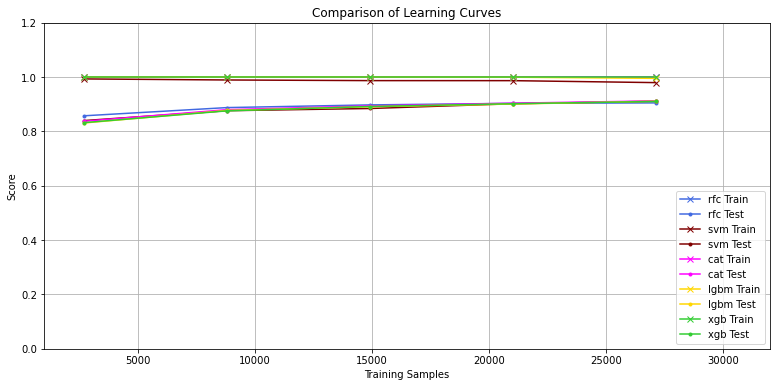

In [8]:
# Central America (old classifiers w/ new TML feats)
X, y = pp.create_xy((14, 14), ['v03', 'v04', 'v10'], drop_prob=False, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale_manual(X, y)
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v10', X_train_ss, y_train)

[10:09:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:19] WARNING: /Users/runner/miniforge3/cond

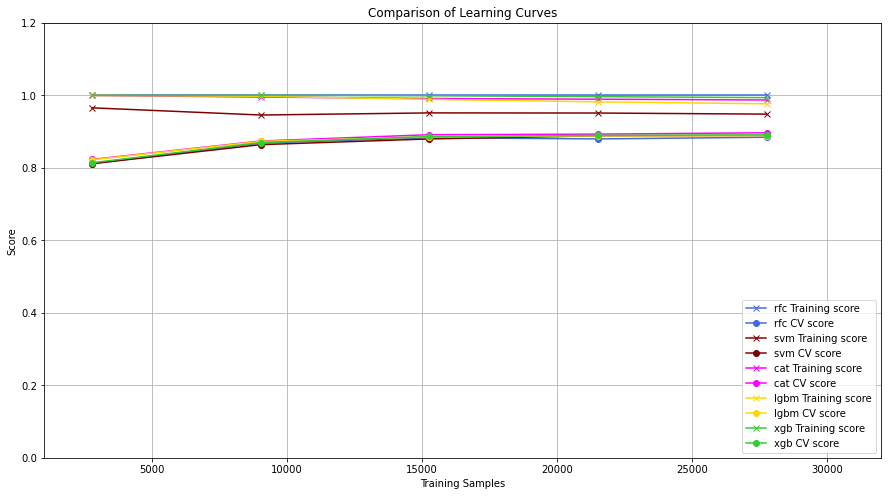

In [16]:
# West Africa
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v8', X_train_ss, y_train)

[11:42:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:42:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:42:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:42:11] WARNING: /Users/runner/miniforge3/cond

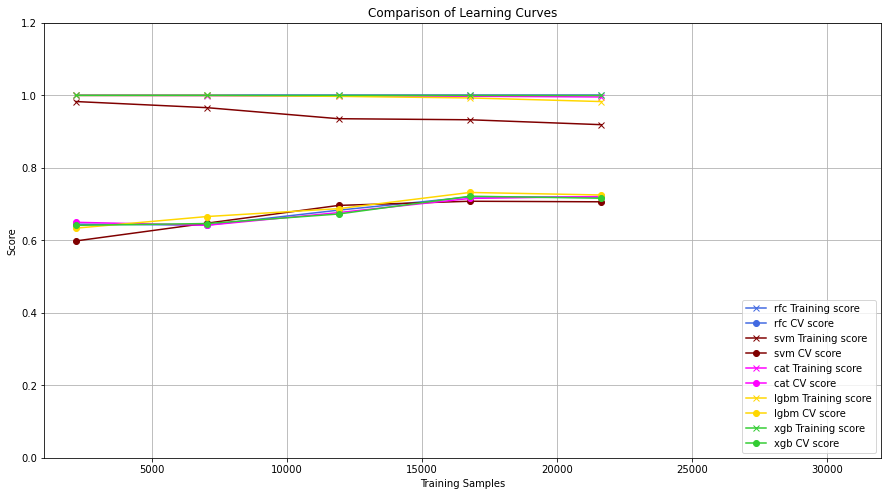

In [25]:
# South America
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v9', X_train_ss, y_train)

# Confirm Value of Transfer Learning
This section tests hypotheses regarding the effectiveness / contribution of the transfer learning approach. This exercise was originally tested on the data / models for Central America due to the quantity of strong training data available for the region. More recently it was re-tested on the data and models for West Africa.
Naming convention:
- np: model trained without TML probability  
- nf: model trained without TML features  

## Drop TML Tree Probability
Test the effect of removing the TML tree probability on performance.

In [12]:
# Central America
# trained all 5 classification models with dropped probability
X, y = pp.create_xy((14, 14), ['v3', 'v4', 'v10'], drop_prob=True, drop_feats=False, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale(X, y)
rp.roc_curve_comp(X_train_ss, X_test_ss, y_train, y_test, ['rfc', 'svm', 'lgbm', 'xgb', 'cat'], 'v10_np')

[16:46:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:06] WARNING: /Users/runner/miniforge3/cond

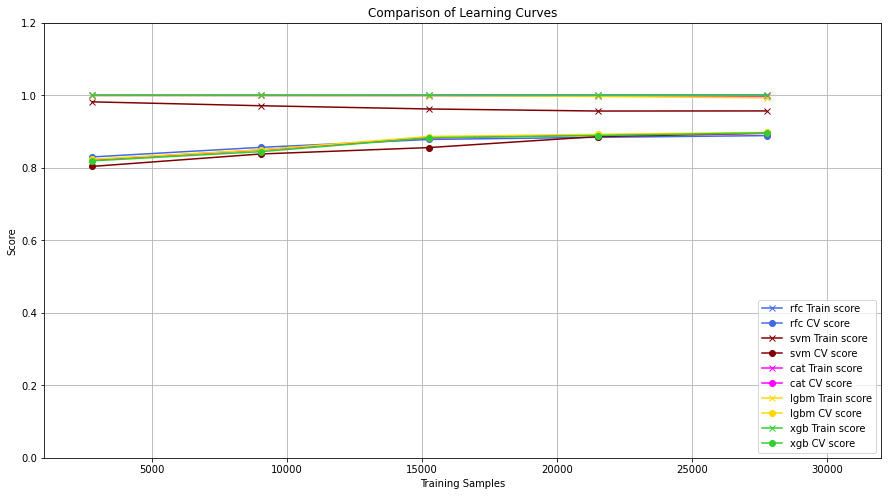

In [52]:
# No TML Probability Learning Curve
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v10_np', X_train_ss, y_train)

## Drop TML Features
Test the effect of removing TML features on performance (how dependent is score on training set size? transfer learning should allow us to require fewer samples).

### Central America

In [40]:
X, y = pp.create_xy((14, 14), ['v3', 'v4', 'v10'], drop_prob=False, drop_feats=True, verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale(X, y)

Training data includes 265 plot ids.
Baseline: 0.491


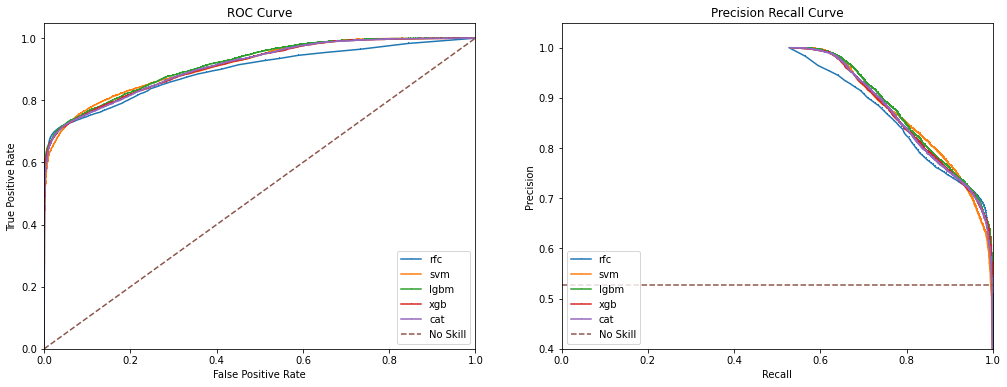

In [48]:
# trained all 5 models with dropped features
rp.roc_curve_comp(X_train_ss, X_test_ss, y_train, y_test, ['rfc', 'svm', 'lgbm', 'xgb', 'cat'], 'v10_nf')

[15:46:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:41] WARNING: /Users/runner/miniforge3/cond

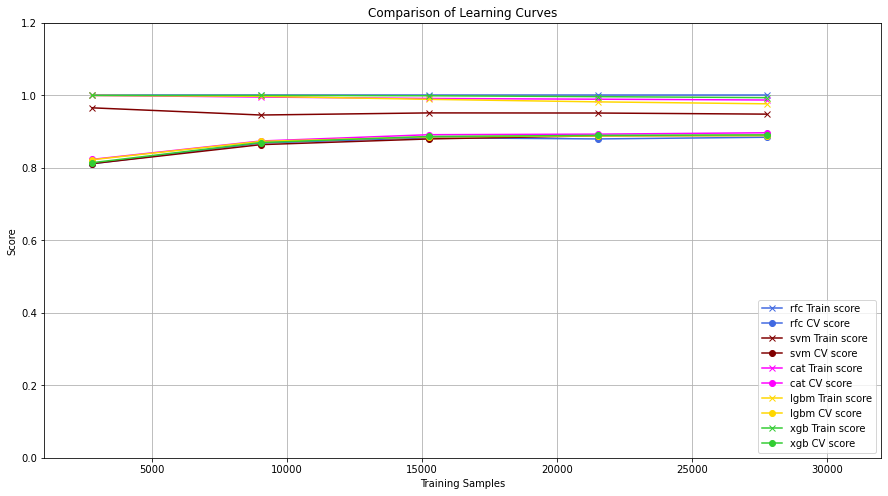

In [49]:
# No Features Learning Curve
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v10_nf', X_train_ss, y_train)

[12:48:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:29] WARNING: /Users/runner/miniforge3/cond

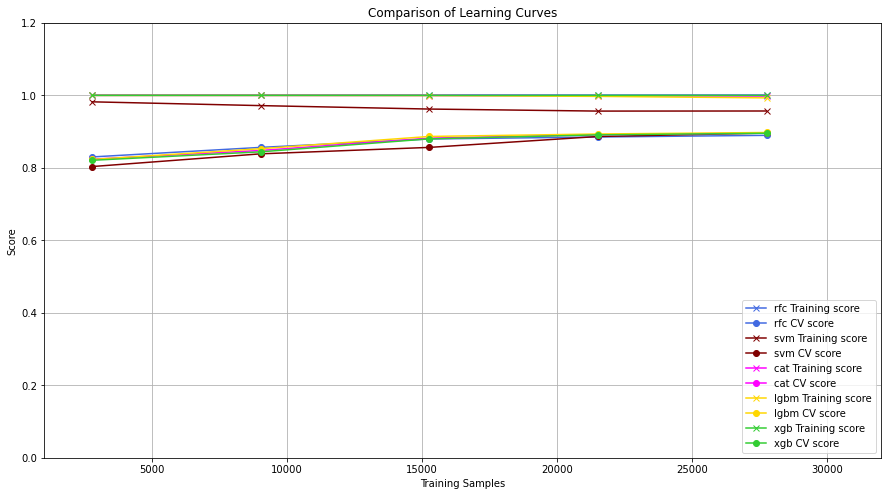

In [29]:
# Normal Learning Curve (incl features)
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v10', X_train_ss, y_train)

### West Africa

/Users/jessica.ertel/opt/anaconda3/envs/plantations3/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/jessica.ertel/opt/anaconda3/envs/plantations3/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/jessica.ertel/opt/anaconda3/envs/plantations3/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/jessica.ertel/opt/anaconda3/envs/plantations3/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/jessica.ertel/opt/anaconda3/envs/plantations3/lib/python3.8/site-packages/xgboost/sklearn

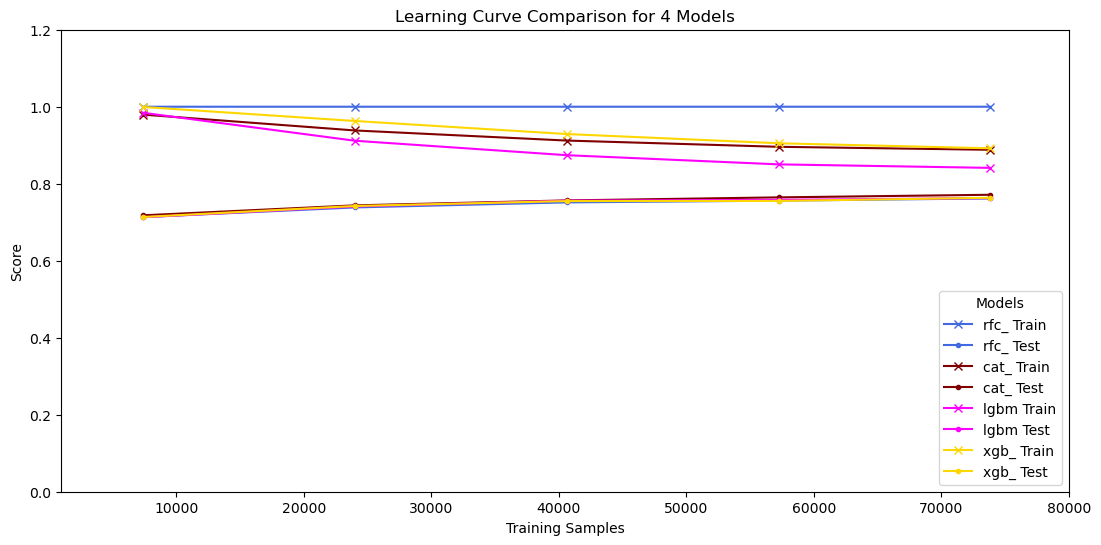

In [23]:
# learning curve with no features
viz.learning_curve_comp(['rfc_v17_nf', 'cat_v17_nf', 'lgbm_v17_nf', 'xgb_v17_nf'], X_train_ss, y_train)

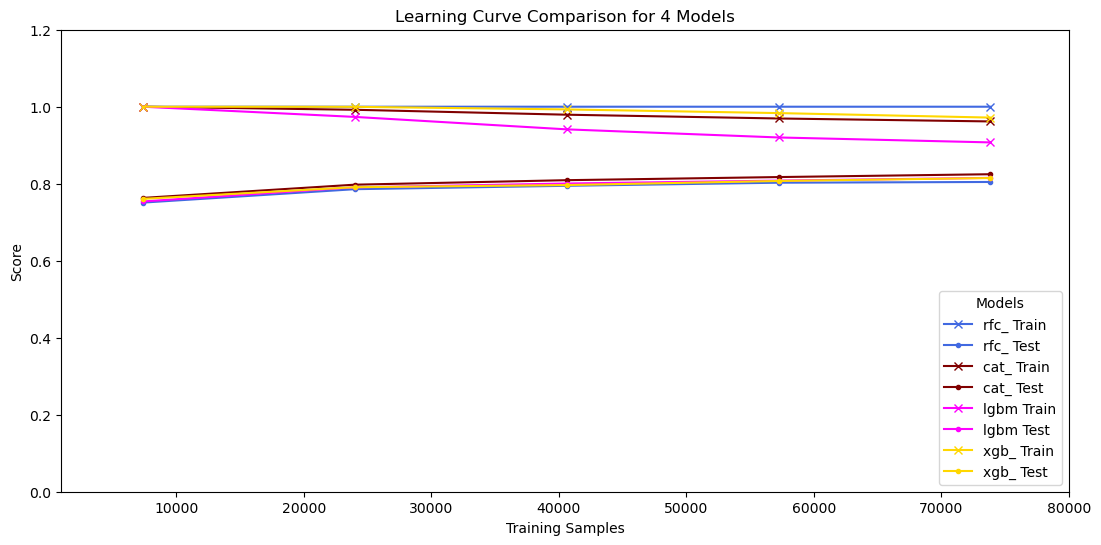

In [26]:
# learning curve with features
viz.learning_curve_comp(['rfc_v17', 'cat_v17', 'lgbm_v17', 'xgb_v17'], X_train_ss, y_train)

# Conclusions

## Learning Curves

The learning curve is a line plot illustrating the relationship between learning (y-axis) over experience (x-axis). The model is scored on both the training and testing sets using R2 as a default.

Learning curves for classification models fit **with TML features** (v_10):
- For all the models except SVM, training performance remains at it's maximum, regardless of the number of training samples.
- CV score increases over time but appears to plateau.
- Overall, performance is consistent across all classification models.

Learning curves for classification models fit **without TML probability** (v_10_np):
- No significant difference observed when removing the probability.

Learning curves for classification models fit **without TML features** (v_10_nf):
- For all models except RFC, training performance sees a minor drop and the model is less overfit as training samples increase.
- CV score sees minor increases over time and performance across classification models has more variation. Performance shows potential to improve as training samples increase.

Conclusions: This exercise supports the hypothesis that transfer learning allows us to require fewer training samples. When TML features are excluded we see 1) Improved scores as sample size increases and 2) Greater variability in performance across the models. The RFC model illustrates the most severe overfitting in all instances. The SVM model appears the most sensitive to sample size.  


## Re-training w/ new TML feats and agroforestry training data
Updates to the tree cover algorithm required retraining of the classification models. The catboost model is retrained (with and without features) for each pilot region. For West Africa and South America, additional agroforestry training data is used during training.   

West Africa
- With retraining and addition of agroforestry data, the catboost model improves in its classification.
- Agroforestry data is solely positive labels, which may explain the substantial increase in true positive predictions. 

Central America
- The only region that did not see an uptick in performance following retraining. The proportion of true plantation predictions (precision) decreased.

South America
- There was likely an improvement due to retraining, but main conclusion here is the significant improvement in the classification due to the addition of agroforestry data in Brazil. Across all metrics, performance improved substantially and the ROC AUC increased from .79 to .94.


# Initial Scaling Exercise
Apply the same steps to a larger sample in Central America and visualize the predictions for each classifier.

In [13]:
sample = lf.load_large_feats((500,500), verbose=True)

s1: (12, 500, 500, 2) -> (500, 500, 2), float32
s2: (12, 500, 500, 10) -> (500, 500, 10), float32
slope: (500, 500) -> (1, 500, 500), float32


In [5]:
sample.shape

(500, 500, 78)

In [16]:
largefeats_reshaped = lf.reshape_and_scale(['v03', 'v04', 'v10'], sample, verbose=True)

Plot id 04003 has no cloud free imagery and will be removed.
Plot id 04005 has no cloud free imagery and will be removed.
Plot id 04007 has no cloud free imagery and will be removed.
Plot id 04009 has no cloud free imagery and will be removed.
Plot id 10043 has no cloud free imagery and will be removed.
Plot id 10067 has no cloud free imagery and will be removed.
Baseline: 0.483
Xtrain Original: (173, 14, 14, 78) Xtrain Reshaped: (33908, 78)
Unseen Original: (500, 500, 78) Unseen Reshaped: (250000, 78)


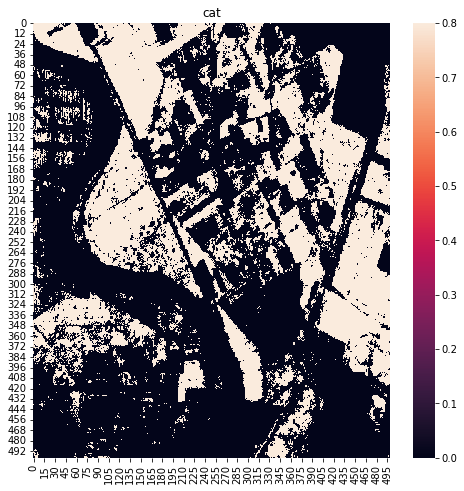

In [21]:
plt.figure(figsize=(8, 8))
lf.visualize_large_feats('cat', 'v10', largefeats_reshaped)

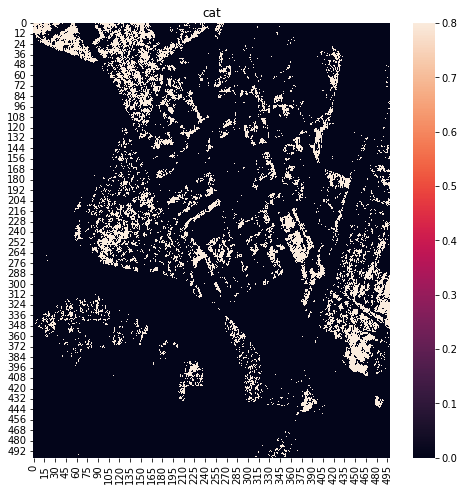

In [8]:
plt.figure(figsize=(8, 8))
lf.visualize_large_feats('cat', 'v10', largefeats_reshaped)

(250000, 78)
(250000,)


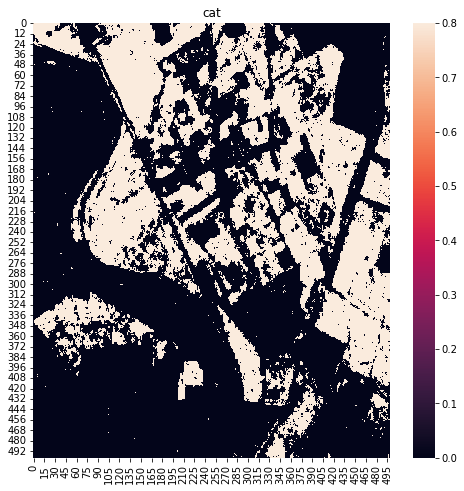

In [6]:
plt.figure(figsize=(8, 8))
preds = rp.visualize_large_feats('cat', 'v10', x2_ss)

In [ ]:
## Results applying the trained model w/o train test split and potential data leakage during scaling

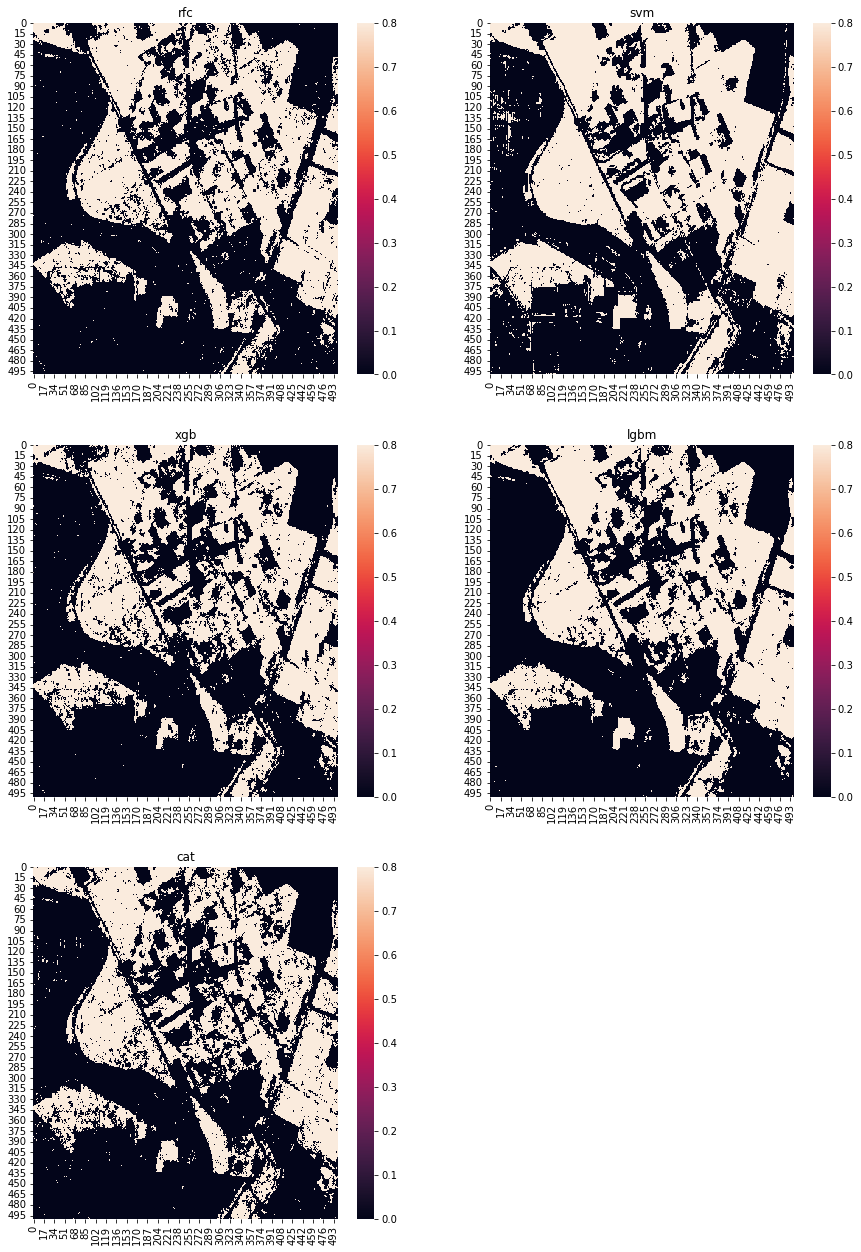

In [13]:
plt.figure(figsize=(15, 22))

x2_ss = pp.load_large_feats((500,500))

plt.subplot(3,2,1)
rp.visualize_large_feats('rfc', 'v4', x2_ss)

plt.subplot(3,2,2)
rp.visualize_large_feats('svm', 'v4', x2_ss)

plt.subplot(3,2,3)
rp.visualize_large_feats('xgb', 'v4', x2_ss)

plt.subplot(3,2,4)
rp.visualize_large_feats('lgbm', 'v4', x2_ss)

plt.subplot(3,2,5)
rp.visualize_large_feats('cat', 'v4', x2_ss)

In [ ]:
# for some reason plots are not being removed properly even if s2 and feats don't exist

In [10]:
plot_ids = ['08001', '08002', '08003', '08004', '08005', '08006', '08007', '08008', '08009', '08010', '08011', '08012', '08013', '08014', '08015', '08016', '08017', '08018', '08019', '08020', '08021', '08022', '08023', '08024', '08025', '08026', '08027', '08028', '08029', '08030', '08031', '08032', '08033', '08034', '08035', '08036', '08037', '08038', '08039', '08040', '08041', '08042', '08043', '08044', '08045', '08046', '08047', '08048', '08049', '08050', '08051', '08052', '08053', '08054', '08055', '08056', '08057', '08058', '08059', '08060', '08061', '08062', '08063', '08064', '08065', '08066', '08067', '08068', '08069', '08070', '08071', '08072', '08073', '08074', '08075', '08076', '08077', '08078', '08079', '08080', '08081', '08082', '08083', '08084', '08085', '08086', '08087', '08088', '08089', '08090', '08091', '08092', '08093', '08094', '08095', '08096', '08097', '08098', '08099', '08100', '08101', '08102', '08103', '08104', '08105', '08106', '08107', '08108', '08109', '08110', '08111', '08112', '08113', '08114', '08115', '08116', '08117', '08118', '08119', '08120', '08121', '08122', '08123', '08124', '08125', '08126', '08127', '08128', '08129', '08130', '08131', '08132', '08133', '08134', '08135', '08136', '08137', '08138', '08139', '08140', '08141', '08142', '08143', '08144', '08145', '08146', '08147', '08148', '08149', '08150', '08151', '08152', '08153', '08154', '08155', '08156', '08157', '08158', '08159', '08160', '08161', '08162', '08163', '08164', '08165', '08166', '08167', '08168', '08169', '08170', '08171', '08172', '08173', '08174', '08175', '08176', '08177', '08178', '08179', '08180', '08181', '08182', '08183', '08184', '08185', '08186', '08187', '08188', '08189', '08190', '08191', '08192', '08193', '08194', '08195', '08196', '08197', '08198', '08199', '08200', '08201', '08202', '08203', '08204', '08205', '08206', '08207', '08208', '08209', '08210', '08211', '08212', '08213', '08214', '08215', '08216', '08217', '08218', '08219', '08220', '08221', '08222', '08223', '08224', '08225']

In [109]:
import os
for plot in plot_ids:
    if not os.path.exists(f'../data/train-s2/{plot}.hkl') and not os.path.exists(f'../data/train-features/{plot}.hkl'):
        print(f'{plot} doesnt exist')